<a href="https://colab.research.google.com/github/joaovprado/Analise-PID-ideal-analogico-e-digital/blob/main/PID%20Ideal/PID%20RLC%20s%C3%A9rie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#pip install control #Instalação da lib CONTROL (necessário executar só uma vez em ambientes novos)

In [37]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Funções de Transferência

In [38]:
Tsim = 200 #tempo simulação
s = ctl.TransferFunction.s

#### Planta

In [39]:
R = 2
C = 10e-3
L = 4

#Tensão no capacitor
P_s = 1/(L*C*s**2+R*C*s+1)
display(P_s)

TransferFunction(array([1]), array([0.04, 0.02, 1.  ]))

#### Controlador PID

In [40]:
Kp = 25
Ki = 6.5
Kd = 5

C_s = (Kd*s**2 + Kp*s + Ki) / s
display(C_s)

TransferFunction(array([ 5. , 25. ,  6.5]), array([1, 0]))

#### Sensor

In [41]:
H_s = 1/1
display(H_s)

1.0

# Malha Fechada

In [42]:
Parte_superior = ctl.series(C_s, P_s) #Controlador * Planta

G1_s = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)
display(G1_s)

TransferFunction(array([ 5. , 25. ,  6.5]), array([ 0.04,  5.02, 26.  ,  6.5 ]))

# Resposta ao degrau

#### Função degrau unitário

In [43]:
T = np.linspace(-1, Tsim, 100000) 

degrau = np.ones_like(T)
degrau[T<0] = 0
degrau[T>15] = 4.5
degrau[T>35] = 2

#### Respostas ao degrau

In [44]:
T, yout = ctl.forced_response(P_s, T, degrau) #step_response(P_s, T, input = degrau)
T, you_mf = ctl.forced_response(G1_s, T, degrau) #step_response(G1_s, T, input = )

#### Plot resultados

Text(0.5, 1.0, 'Sistema de 2ª ordem')

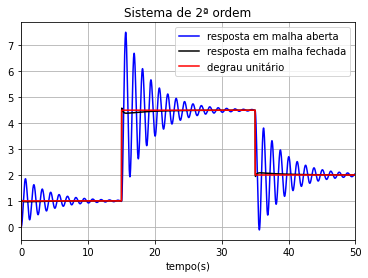

In [45]:
plt.plot(T, yout, 'b-') 
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(-0.1,50)
plt.title('Sistema de 2ª ordem')

Text(0.5, 1.0, 'Sistema RLC série')

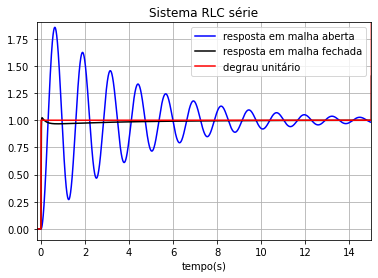

In [46]:
plt.plot(T, yout, 'b-')
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(-0.2,15)
plt.ylim(-0.1,1.9)
plt.title('Sistema RLC série') 

Text(0.5, 1.0, 'Sistema RLC série')

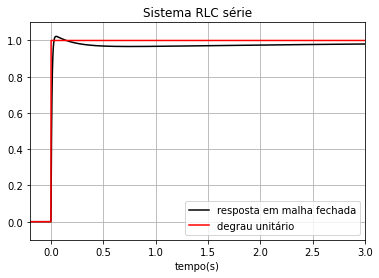

In [47]:
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend(['resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(-0.2,3)
plt.ylim(-0.1,1.1)
plt.title('Sistema RLC série') 